## PREPROCAMIENTO DE IMAGENES PRESCRIPCIONES MEDICAS - TROQUELES MEDICAMENTOS 

In [2]:
# import the necessary packages
import keras
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from scipy import ndimage
from imutils import paths
import random
%matplotlib inline
import os, fnmatch
import keras
from keras import backend as K
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


In [12]:
# Leer archivos para preprocesar 
fpaths = []
images = []
relevant_path = "imagenes6/"
pattern = "*.jpg"  
#for w in os.listdir('images/imagenes3/'):
#    fpaths.append('images/imagenes3/' + w)
#for w in os.listdir('images'):
for w in os.listdir(relevant_path):
    if w not in images:
        if fnmatch.fnmatch(w, pattern):
           fpaths.append(relevant_path + w)
           images.append(w);
        
print('Cantidad Imagenes:', images)
print('Paths: ', fpaths)
len(images)


Cantidad Imagenes: ['barcode610.jpg', 'barcode6100.jpg', 'barcode6101.jpg', 'barcode6102.jpg', 'barcode6103.jpg', 'barcode6104.jpg', 'barcode6105.jpg', 'barcode6106.jpg', 'barcode6107.jpg', 'barcode6108.jpg', 'barcode6109.jpg', 'barcode611.jpg', 'barcode6110.jpg', 'barcode6111.jpg', 'barcode6112.jpg', 'barcode6113.jpg', 'barcode6114.jpg', 'barcode6115.jpg', 'barcode6116.jpg', 'barcode6117.jpg', 'barcode6118.jpg', 'barcode6119.jpg', 'barcode612.jpg', 'barcode6120.jpg', 'barcode6121.jpg', 'barcode6122.jpg', 'barcode6123.jpg', 'barcode6124.jpg', 'barcode6125.jpg', 'barcode6126.jpg', 'barcode6127.jpg', 'barcode6128.jpg', 'barcode6129.jpg', 'barcode613.jpg', 'barcode6130.jpg', 'barcode6131.jpg', 'barcode6132.jpg', 'barcode6133.jpg', 'barcode6134.jpg', 'barcode6135.jpg', 'barcode6136.jpg', 'barcode6137.jpg', 'barcode6138.jpg', 'barcode6139.jpg', 'barcode614.jpg', 'barcode6140.jpg', 'barcode6141.jpg', 'barcode6142.jpg', 'barcode6143.jpg', 'barcode6144.jpg', 'barcode6145.jpg', 'barcode6146.jpg

340

In [4]:
def detectH(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction
    gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    # blur and threshold the image
    blurred = cv2.blur(gradient, (9, 9))
    (_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

    # Horizontales 
    # construct a closing kernel and apply it to the thresholded image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # perform a series of erosions and dilations
    closed = cv2.erode(closed, None, iterations=4)
    closed = cv2.dilate(closed, None, iterations=4)

    # find the contours in the thresholded image
    (_, cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # if no contours were found, return None
    if len(cnts) == 0:
        return None

    # otherwise, sort the contours by area and compute the rotated
    # bounding box of the largest contour
    c = sorted(cnts, key=cv2.contourArea, reverse=True)[:4]
    
    # return the bounding box of the barcode
    return c 

def detectV(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # compute the Scharr gradient magnitude representation of the images
    # in both the x and y direction
    gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
    gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

    # subtract the y-gradient from the x-gradient
    gradient = cv2.subtract(gradX, gradY)
    gradient = cv2.convertScaleAbs(gradient)

    # blur and threshold the image
    blurred = cv2.blur(gradient, (9, 9))
    (_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

    # Verticales 
    # construct a closing kernel and apply it to the thresholded image
    kernelV = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 21))
    closedV = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernelV)

    # perform a series of erosions and dilations
    closedV = cv2.erode(closedV, None, iterations=4)
    closedV = cv2.dilate(closedV, None, iterations=4)

    # find the contours in the thresholded image
    (_, cntsV, _) = cv2.findContours(closedV.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # if no contours were found, return None
    if len(cntsV) == 0:
        return None

    # otherwise, sort the contours by area and compute the rotated
    # bounding box of the largest contour
    cV = sorted(cntsV, key=cv2.contourArea, reverse=True)[:4]
    
    # return the bounding box of the barcode
    return cV 

In [10]:
count = 1

margenX = 90
margenY = 20

for idx in range(0, len(fpaths)):
    imagen_ori = cv2.imread(fpaths[idx])
    ## HORIZONTAL 
    print(imagen_ori.shape)
    c = detectH(imagen_ori)
    cV = detectV(imagen_ori)
    c = c + cV 
    for index in range(0 , len(c)):
         x , y, w , h = cv2.boundingRect(c[index])
         count = count + 1  
    
         if w > h:
             w = 350
             h = 150
             margenX = 90
             margenY = 20
             rect = cv2.minAreaRect(c[index])
             box = np.int0(cv2.boxPoints(rect))
             image_new = imagen_ori[y-margenY:y+h, x-margenX:x+w]
         else:
             w = 350
             h = 150
             margenX = 20
             margenY = 90
             rect = cv2.minAreaRect(c[index])
             box = np.int0(cv2.boxPoints(rect))
             image_new = imagen_ori[y+margenY:y+h, x+margenX:x+w]
   
         #cv2.drawContours(image, [box], -1, (0, 255, 0), 3)   
         imageNameOut = "barcode8" + str(count+1) + ".jpg"
         #cv2.imwrite("images_out/"+imageNameOut, image_new)
         cv2.imwrite("imagenes7/"+imageNameOut, image_new)
         #plt.imshow(imagen_ori)
         #plt.imshow(image_new)
         #plt.show()
         #cv2.imshow("Image", imagen_ori)
         #cv2.imshow("Image Trq", image_new)
         #cv2.waitKey(20)  
         #cv2.destroyAllWindows(); 


(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)


In [11]:
margenX = 90
margenY = 20

for idx in range(0, len(fpaths)):
    imagen_ori = cv2.imread(fpaths[idx])
    ## VERTICAL 
    print(imagen_ori.shape)
    c = detectH(imagen_ori)
    cV = detectV(imagen_ori)
    c = c + cV 
    for index in range(0 , len(c)):
         x , y, w , h = cv2.boundingRect(c[index])
         count = count + 1  
    
         if w > h:
            w = 180
            h = 350
            margenX = 90
            margenY = 250
            rect = cv2.minAreaRect(c[index])
            box = np.int0(cv2.boxPoints(rect))
            image_new = imagen_ori[y-margenY:y+h, x-margenX:x+w]
         else:
            w = 350
            h = 150
            margenX = 20
            margenY = 90
            rect = cv2.minAreaRect(c[index])
            box = np.int0(cv2.boxPoints(rect))
            image_new = imagen_ori[y+margenY:y+h, x+margenX:x+w]
   
         #cv2.drawContours(image, [box], -1, (0, 255, 0), 3)   
         imageNameOut = "barcode10" + str(count+1) + ".jpg"
         #cv2.imwrite("images_out/"+imageNameOut, image_new)
         cv2.imwrite("imagenes6/"+imageNameOut, image_new)
         #plt.imshow(imagen_ori)
         #plt.imshow(image_new)
         #plt.show()
         #v2.imshow("Image", imagen_ori)
         #cv2.imshow("Image Trq", image_new)
         #cv2.waitKey(20)  
         #cv2.destroyAllWindows(); 


(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)
(1654, 2339, 3)


In [ ]:
# OK EN USO ******** 04/12/2017 
# Datos de Entrenamiento BARCODES CORRECTOS 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import numpy as np 

img_width=430
img_height=430
img_channels=1 

# construct the image generator for data augmentation
datagen = ImageDataGenerator(
        rotation_range=30,
        rescale=1./255,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
        fill_mode='nearest')

xa = []
ya = []
#img = load_img('data/test/test_1/barcode_test1.jpg')  # this is a PIL image
img = cv2.imread('data/test/1/barcode_test1.jpg', cv2.IMREAD_GRAYSCALE) 
#img = cv2.resize(img, (img_width, img_height), img_channels)
img = cv2.resize(img, (32, 32), img_channels)
x = img_to_array(img)
xa.append(x)
xa = np.array(xa, dtype="float") / 255.0
ya.append(1)

print('x_train shape:', xa.shape)
print('len : :', len(xa) )

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 1
for batch in datagen.flow(xa, ya, batch_size=1,save_to_dir='data/test/test_1/generado', save_prefix='bargen', save_format='jpg'):
    i += 1
    if i > 10:
        break  # otherwise the generator would loop indefinitely 

In [6]:
#Leer Imagenes para generar augmentacion
# Leer archivos para preprocesar 
# relevant_path = "data/train/train_1/"
relevant_path = "data/train/"
pattern = "*.jpg"  
img_width=430
img_height=430

nb_classes = 2

img_channels = 1

print('Formato imagenes: ', K.image_data_format())
# Formato imagenes:  channels_last
 
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(relevant_path)))
random.seed(42)
random.shuffle(imagePaths)

# load the image, pre-process it, and store it in the data list
for imagePath in imagePaths:
    #fpaths.append(relevant_path + w)
    #if w not in images:
    #    if fnmatch.fnmatch(imagePath, pattern):
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (img_width, img_height), img_channels)
    image = img_to_array(image)
    data.append(image)
        
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    label = 1 if (label.endswith("1")) else 0
    labels.append(label)
    
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)        
        
print('Cantidad imagenes: ', len(data))  
print('x_train shape:', data.shape)
print(data.shape[0], 'train samples')


Formato imagenes:  channels_last
[INFO] loading images...
Cantidad imagenes:  248
x_train shape: (248, 430, 430, 1)
248 train samples


In [7]:
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test= keras.utils.to_categorical(y_test, num_classes)

C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (71, 430, 430, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


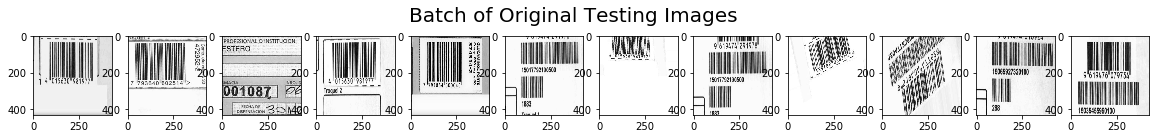

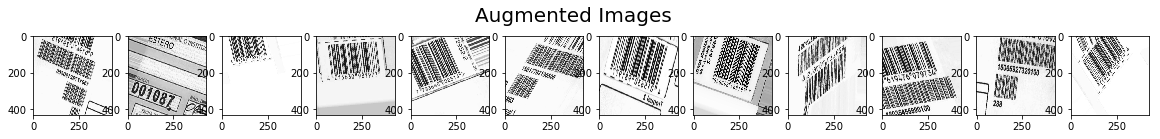

In [14]:
import matplotlib.pyplot as plt
from matplotlib import cm

# construct the image generator for data augmentation
datagen_test = ImageDataGenerator(
        rotation_range=30,
        rescale=1./255,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True, 
        fill_mode='nearest')

# fit augmented image generator on data
datagen_test.fit(x_test)

# take subset of Testing data
x_test_batch = x_test[:12]

# Color 
cmap = cm.gray  # gist_gray

# visualize batch of Testing data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_test_batch)):
    ax = fig.add_subplot(1, 12, i+1)
    image = array_to_img(x_test_batch[i])
    ax.imshow(image, cmap=cmap)
fig.suptitle('Batch of Original Testing Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_augm in datagen_test.flow(x_test_batch, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        image = array_to_img(x_augm[i])
        ax.imshow(image, cmap=cmap)
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;